In [1]:
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
#config
inputSize = 5
outputSize = 3
batchSize = 10
testSize = 5
epochs = 400
learningRate = 0.01
seed = 123456

In [3]:
#create functions
#Operator example in forward and backward (Mult)
def forwardMult(A,B):
    return np.matmul(A,B) 

def backwardMult(dC,A,B,dA,dB):
    dA += np.matmul(dC,np.matrix.transpose(B))
    dB += np.matmul(np.matrix.transpose(A),dC)
    
#Loss example in forward and backward (RMSE)
def forwardloss(predictedOutput,realOutput):
    if(predictedOutput.shape == realOutput.shape):
        loss = np.mean( 0.5*np.square(predictedOutput - realOutput))       
    else :
        print("Shape of arrays not the same")
    return loss

def backwardloss(predictedOutput,realOutput):
    if(predictedOutput.shape == realOutput.shape):
        deltaOutput = (predictedOutput - realOutput)/predictedOutput.size
    else :
        print("Shape of arrays not the same")
    return deltaOutput

#Optimizer example (SGD)
def updateweights(W,dW,learningRate):
    W -= learningRate * dW

In [4]:
#Generation of fake dataset - we generate random inputs and weights and calculate outputs
np.random.seed(seed)
inputArray = np.random.uniform(-5,5,(batchSize,inputSize))
weights = np.random.uniform(-5,5,(inputSize,outputSize))
outputArray = np.matmul(inputArray,weights)
inputTest = np.random.uniform(-5,5,(testSize,inputSize))
outputTest = np.matmul(inputTest,weights)

In [5]:
inputArray

array([[-3.73030167,  4.66717838, -2.39523994,  3.97236524, -1.23250284],
       [-1.63778256, -0.4862353 ,  3.40255083, -3.76897856,  0.43026202],
       [-1.26987775, -0.52003175, -3.7055932 ,  3.59878707,  3.20388363],
       [-1.47946461, -2.71112696,  2.76783751,  0.94783589, -3.62446443],
       [ 3.52899781, -2.64492522, -3.53772767,  0.89868773,  0.74011775],
       [-4.38730038,  0.90426003, -2.54650181, -1.59555063,  4.84728739],
       [ 4.19540405, -4.62228312,  3.6154929 ,  2.53568845, -0.94821245],
       [-1.56474125, -3.29082828, -1.0534099 ,  1.4166617 , -2.25407569],
       [-0.37645666,  3.71371654, -0.98868778,  1.1058827 , -3.8203287 ],
       [ 2.02184361, -0.85966335, -1.57654787,  0.95925321, -3.00135737]])

In [6]:
outputArray

array([[ 20.6768939 , -29.71868231,   5.75368214],
       [  6.86816265,   7.61094193,  18.82294379],
       [ -9.63726159, -26.41146376,  10.67733585],
       [ 31.34877658,  33.75492349,  -2.63642922],
       [-25.96702153,   2.45309506, -22.20144941],
       [-12.87306094, -44.68975321,  37.15585938],
       [  6.30264574,  48.26811154, -16.66583296],
       [ 15.11446364,  15.44104618,  -5.16952458],
       [ 14.12728662,  -3.6535083 , -17.79070525],
       [  0.04972998,  14.70611177, -26.96576621]])

In [7]:
inputTest

array([[-3.65900761,  1.30699553,  1.39568218, -0.66510215, -3.4415294 ],
       [ 3.62608983,  1.83046301, -4.14291102,  0.66102526, -3.50175146],
       [-0.22545554,  3.48938265, -3.5985558 , -1.70449185,  1.3407411 ],
       [ 1.19378493, -1.04957363,  1.72397815,  3.0998032 , -1.13000944],
       [ 0.44758747,  4.88949362,  4.84982907, -1.29618208,  0.62941932]])

In [8]:
outputTest

array([[ 29.84199788,   5.23386209,   5.87002443],
       [-14.53100643,  -0.74876053, -42.89115253],
       [-21.19204332, -35.39753098,  -0.95828189],
       [ 13.35977539,  20.35431271,  -7.6149863 ],
       [  8.10210631,  -2.77530335,  12.13804306]])

In [9]:
#initialization of NN by other random weights
nnWeights = np.random.uniform(-3,3,(inputSize,outputSize))
deltaweights = np.zeros((inputSize,outputSize))
deltainput = np.zeros((batchSize,inputSize))
deltaoutput = np.zeros((inputSize,outputSize))

In [10]:
#Comparing the dataset weights 
weights

array([[-4.00263237,  2.34596222, -4.8345549 ],
       [-0.186155  , -4.04061126, -0.02693667],
       [ 3.38796274,  3.97333257,  2.32591519],
       [ 2.58724364,  0.60657183, -0.28522073],
       [-3.61231882, -4.05538867,  4.42256339]])

In [11]:
#with the NN weights
nnWeights

array([[-1.50136739,  2.85870823,  1.89927354],
       [-2.73390942, -0.54100287, -2.82068023],
       [-1.75259698,  0.7847937 ,  0.94378938],
       [-1.50410391,  2.9587439 , -2.81435983],
       [-0.86099938, -1.51593029, -1.87249127]])

In [12]:
historyTrain=[] #Used to record the history of loss
historyTest=[]
i = 1
while i <= epochs:
    #Forward pass train:
    nnOutput = forwardMult(inputArray,nnWeights)
    lossTrain = forwardloss(nnOutput,outputArray)
    historyTrain.append(lossTrain)
    
    #Forward pass test:
    nnTest = forwardMult(inputTest,nnWeights)
    lossTest = forwardloss(nnTest,outputTest)
    historyTest.append(lossTest)
    #Print Loss every 50 epochs: 
    if(i%10==0):
        print("Epoch: " + str(i) + " Loss (train): " + "{0:.3f}".format(lossTrain) + " Loss (test): " + "{0:.3f}".format(lossTest))
    
    #Backpropagate
    deltaoutput = backwardloss(nnOutput,outputArray)
    backwardMult(deltaoutput,inputArray,nnWeights,deltainput,deltaweights)
    
    #Apply optimizer
    updateweights(nnWeights,deltaweights, learningRate)
    
    #Reset deltas 
    deltainput = np.zeros((batchSize,inputSize))
    deltaweights = np.zeros((inputSize,outputSize))
    deltaoutput = np.zeros((inputSize,outputSize))
    
    #Start new epoch
    i = i+1

Epoch: 10 Loss (train): 139.093 Loss (test): 135.703
Epoch: 20 Loss (train): 72.917 Loss (test): 97.018
Epoch: 30 Loss (train): 42.783 Loss (test): 73.837
Epoch: 40 Loss (train): 27.811 Loss (test): 58.390
Epoch: 50 Loss (train): 19.624 Loss (test): 47.288
Epoch: 60 Loss (train): 14.704 Loss (test): 38.904
Epoch: 70 Loss (train): 11.493 Loss (test): 32.369
Epoch: 80 Loss (train): 9.251 Loss (test): 27.163
Epoch: 90 Loss (train): 7.602 Loss (test): 22.952
Epoch: 100 Loss (train): 6.339 Loss (test): 19.504
Epoch: 110 Loss (train): 5.343 Loss (test): 16.655
Epoch: 120 Loss (train): 4.540 Loss (test): 14.280
Epoch: 130 Loss (train): 3.881 Loss (test): 12.287
Epoch: 140 Loss (train): 3.334 Loss (test): 10.605
Epoch: 150 Loss (train): 2.875 Loss (test): 9.178
Epoch: 160 Loss (train): 2.487 Loss (test): 7.961
Epoch: 170 Loss (train): 2.157 Loss (test): 6.920
Epoch: 180 Loss (train): 1.875 Loss (test): 6.025
Epoch: 190 Loss (train): 1.632 Loss (test): 5.255
Epoch: 200 Loss (train): 1.424 Loss 

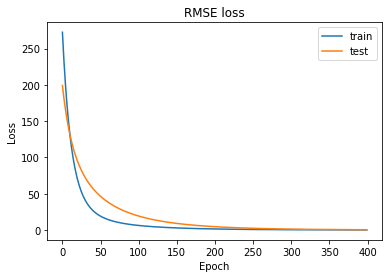

In [13]:
plt.plot(historyTrain)
plt.plot(historyTest)
plt.title('RMSE loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','test'], loc='upper right')
plt.show()

In [14]:
# Original weights used to generate the dataset
weights

array([[-4.00263237,  2.34596222, -4.8345549 ],
       [-0.186155  , -4.04061126, -0.02693667],
       [ 3.38796274,  3.97333257,  2.32591519],
       [ 2.58724364,  0.60657183, -0.28522073],
       [-3.61231882, -4.05538867,  4.42256339]])

In [15]:
# Learned weights of the NN
nnWeights

array([[-4.04533436,  2.3788998 , -4.87272339],
       [-0.29534094, -3.9852363 , -0.13807301],
       [ 3.16059177,  4.05947631,  2.08047218],
       [ 2.35157153,  0.6917928 , -0.54164365],
       [-3.78222308, -3.98801605,  4.24041106]])